In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
total_clients_df=pd.read_csv('total_clients_df.csv',parse_dates=['date'])
ortho_installations_df=pd.read_csv('installations_df.csv',parse_dates=['date'])
ortho_appointments_df=pd.read_csv('appointments_df.csv' ,parse_dates=['ortho_maintenance_date'])

In [9]:
total_clients_df.info()
ortho_installations_df.info()
ortho_appointments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9057 entries, 0 to 9056
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        9057 non-null   datetime64[ns]
 1   patient_id  9057 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 141.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1655 non-null   datetime64[ns]
 1   patient_id  1655 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 26.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   patient_id               19648 non-null  object 

In [10]:
print(' Descriptive Statistics for Initial Consultations of Total Patients Examed:')
total_clients_df.describe() ## since i altered the 'CPF' patient_id number in order to show the last 2 digits for not reveal the real patients real document number, the unique count values are wrong.

 Descriptive Statistics for Initial Consultations of Total Patients Examed:


,date
count,9057
mean,2023-03-29 22:26:40.264988416
min,2020-02-11 00:00:00
25%,2022-05-11 00:00:00
50%,2023-05-11 00:00:00
75%,2024-01-13 00:00:00
max,2025-06-04 00:00:00


In [11]:
print('Descriptive Statistics for the total of patients that initialiazed Orthodontic Treatments:')
ortho_installations_df.describe() ## since i altered the 'CPF' patient_id number in order to show the last 2 digits for not reveal the real patients real document number, the unique count values are wrong.

Descriptive Statistics for the total of patients that initialiazed Orthodontic Treatments:


,date
count,1655
mean,2022-02-25 19:10:15.589123840
min,2020-02-12 00:00:00
25%,2020-11-03 00:00:00
50%,2021-09-23 00:00:00
75%,2023-05-29 12:00:00
max,2025-06-04 00:00:00


In [12]:
print('Descriptive Statistics for the orthodontic patients appointments records through the years')
ortho_appointments_df.describe()

Descriptive Statistics for the orthodontic patients appointments records through the years


,ortho_maintenance_date,ortho_maintenance_count
count,19648,19646.000000
mean,2022-10-08 03:24:55.114006528,11.067800
min,2020-02-12 00:00:00,1.000000
25%,2021-08-27 00:00:00,4.000000
50%,2022-09-01 00:00:00,9.000000
75%,2023-10-23 00:00:00,16.000000
max,2025-06-04 00:00:00,55.000000
std,NaN,9.111491


In [13]:
ortho_appointments_df

,patient_id,ortho_maintenance_date,ortho_maintenance_count
0,*********20-05,2020-02-28,1.0
1,*********20-03,2020-02-12,1.0
2,*********30-63,2020-02-12,1.0
3,*********70-46,2020-02-28,1.0
4,*********00-01,2020-02-28,1.0
...,...,...,...
19643,*********02-36,2025-06-04,17.0
19644,*********80-32,2025-06-04,40.0
19645,*********80-66,2025-06-04,2.0
19646,*********50-90,2025-06-04,6.0


In [14]:
## 1-conversion rate of patients examined and patients that initiated orthodontic treatment

total_pacientes_examinados = total_clients_df['patient_id'].nunique() ### Count the total number of unique patients who had an initial consultation. # This represents the total "pool" of potential customers
print(f"Total patients who had an initial consultation:: {total_pacientes_examinados}")

total_pacientes_instalacao = ortho_installations_df['patient_id'].nunique() ## Count the total number of unique patients who proceeded with an installation. # This represents the number of patients who converted
print(f"Total patients who proceeded with installation: {total_pacientes_instalacao}")


conversion_rate = (total_pacientes_instalacao / total_pacientes_examinados) * 100

print(f"Conversion rate from initial consultation to installation is: {conversion_rate:.2f}%")



Total patients who had an initial consultation:: 1233
Total patients who proceeded with installation: 939
Conversion rate from initial consultation to installation is: 76.16%


In [15]:
## Appointment Distribution per Patient

appointment_counts_per_patient = ortho_appointments_df.groupby('patient_id')['ortho_maintenance_count'].max() ## Group the data by patient and find the maximum (total) number of appointments. As result,the index is the patient_id and the value is the total appointments.

appointment_distribution = appointment_counts_per_patient.value_counts().sort_index() ## Here the result shows how many patients had 1, 2, 3, 4, etc. appointments.

print('Distribution of Maintenance Appointments per Patient')
print(appointment_distribution)
print(f"\nTotal unique patients in the appointments table: {len(appointment_counts_per_patient)}") ## distribution and the total unique patients.
avg_appointments_per_patient = appointment_counts_per_patient.mean()
print(f"The avarage number of appointments a patient show's is: {avg_appointments_per_patient:.0f}")

Distribution of Maintenance Appointments per Patient
ortho_maintenance_count
1.0     62
2.0     50
3.0     43
4.0     36
5.0     30
6.0     57
7.0     37
8.0     39
9.0     45
10.0    21
11.0    33
12.0    23
13.0    14
14.0    24
15.0    21
16.0    24
17.0    28
18.0    24
19.0    21
20.0    17
21.0    24
22.0    21
23.0    23
24.0    15
25.0    10
26.0    18
27.0    14
28.0    24
29.0    18
30.0    13
31.0    11
32.0    13
33.0     2
34.0     7
35.0     5
36.0    13
37.0     4
38.0     8
39.0     8
40.0     3
41.0     7
42.0     5
43.0     2
44.0     2
45.0     3
46.0     2
47.0     1
48.0     4
49.0     1
51.0     2
55.0     1
Name: count, dtype: int64

Total unique patients in the appointments table: 933
The avarage number of appointments a patient show's is: 15


In [21]:
## Average interval (in days) between maintenance appointments

ortho_appointments_sorted = ortho_appointments_df.sort_values(by=['patient_id', 'ortho_maintenance_date']) ## First order data by patient_id and date

appointment_intervals = ortho_appointments_sorted.groupby('patient_id')['ortho_maintenance_date'].diff().dt.days ## Calculate the time difference between consecutive appointments for each patient, then extract the number of days with `.dt.days`

average_interval_days = appointment_intervals.dropna().mean() ## drop the nan values (which are the first appointment for each patient) and calculate the mean.

print(f"The average interval between maintenance appointments is: {average_interval_days:.2f} days.")


The average interval between maintenance appointments is: 43.71 days.


In [22]:
## Monthly Trend Analysis

monthly_consultations = total_clients_df.groupby(total_clients_df['date'].dt.to_period('M')).size() ## Group and count initial consultations by month/year.
print('New patients initial consultations by month')
print(monthly_consultations)

monthly_installations = ortho_installations_df.groupby(ortho_installations_df['date'].dt.to_period('M')).size() ## Group and count installations by month/year.
print('New orthodontic installations by month')
print(monthly_installations)

monthly_appointments = ortho_appointments_df.groupby(ortho_appointments_df['ortho_maintenance_date'].dt.to_period('M')).size() ## Group and count appointments by month/year.
print('Number of appointments by month')
print(monthly_appointments)

New patients initial consultations by month
date
2020-02     16
2020-03     21
2020-04      8
2020-05     13
2020-06      8
          ... 
2025-02    156
2025-03    241
2025-04    105
2025-05    130
2025-06     29
Freq: M, Length: 64, dtype: int64
New orthodontic installations by month
date
2020-02    14
2020-03    17
2020-04    43
2020-05    67
2020-06    51
           ..
2025-02    17
2025-03    12
2025-04     6
2025-05     8
2025-06     2
Freq: M, Length: 65, dtype: int64
Number of appointments by month
ortho_maintenance_date
2020-02     11
2020-03     22
2020-04     60
2020-05    116
2020-06    148
          ... 
2025-02    262
2025-03    265
2025-04    234
2025-05    195
2025-06     37
Freq: M, Length: 65, dtype: int64


In [61]:
## calculate total appointments per patient ---
appointment_counts_per_patient = ortho_appointments_df.groupby('patient_id')['ortho_maintenance_count'].max()

## define the engagement criteria. by number of appointments per patient

bins = [0, 12, 24, float('inf')]
labels = ['Low Engagement', 'Medium Engagement', 'High Engagement']

## create the new classification column. using pd.cut() to categorize each patient
engagement_levels = pd.cut(appointment_counts_per_patient, bins=bins, labels=labels, right=True)

## final DataFrame for the visualization
df_engajament = engagement_levels.to_frame(name='Engagement level')


print("Patient Classification by Engagement Level:\n")
print(df_engajament.head())

## Total patient count in each level
contagem_engajamento = df_engajament['Engagement level'].value_counts().sort_index()
print("\n Count of patients by engagement level\n")
print(contagem_engajamento)

Patient Classification by Engagement Level:

                 Engagement level
patient_id                       
*********00-00    High Engagement
*********00-01  Medium Engagement
*********00-02     Low Engagement
*********00-03     Low Engagement
*********00-04    High Engagement

 Count of patients by engagement level

Engagement level
Low Engagement       476
Medium Engagement    256
High Engagement      201
Name: count, dtype: int64


C:\Program Files\KMSpico\temp\ipykernel_3948\951189183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem_engajamento.index, y=contagem_engajamento.values, palette='Blues')


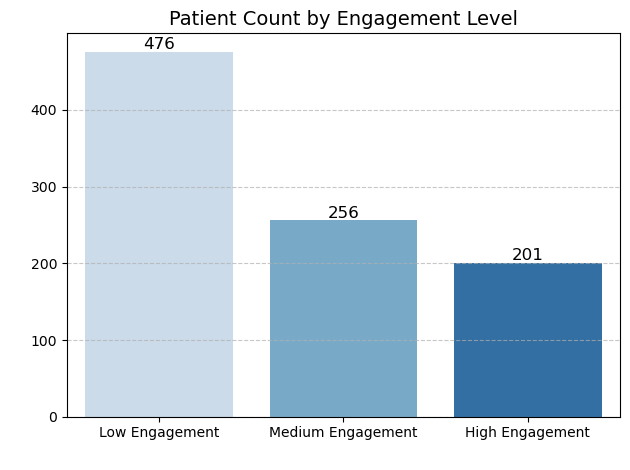


Patient Count by Engagement Level

Engagement level
Low Engagement       476
Medium Engagement    256
High Engagement      201
Name: count, dtype: int64


In [64]:
##Create the bar chart
ax = sns.barplot(x=contagem_engajamento.index, y=contagem_engajamento.values, palette='Blues')

## add each bar with the patient count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Patient Count by Engagement Level', fontsize=14)
plt.xlabel(' ', fontsize=10)
plt.ylabel(' ', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nPatient Count by Engagement Level\n")
print(contagem_engajamento)

In [63]:
##  Find the most recent appointment date for each patient
last_appointment = ortho_appointments_df.groupby('patient_id')['ortho_maintenance_date'].max()

##  Sort the dataframe by patient and date to calculate intervals 
sorted_appointments_df = ortho_appointments_df.sort_values(by=['patient_id', 'ortho_maintenance_date'])
appointment_intervals = sorted_appointments_df.groupby('patient_id')['ortho_maintenance_date'].diff().dt.days ## ## interval in days between consecutive appointments for each patient
mean_interval_days = appointment_intervals.dropna().mean() ##average interval from the valid intervals (ignoring the first NaN for each patient)##
print(f"The average maintenance appointment interval is: {mean_interval_days:.2f} days.")

## Define the abandonment criterion  (3 times the average interval).##
dropout_limit_days = mean_interval_days * 3

##Get the most recent date from the entire dataset to serve as a reference point.##
current_date = ortho_appointments_df['ortho_maintenance_date'].max() 
print(f"Dropout criterion: Last appointment was more than {dropout_limit_days:.2f} days ago.")

days_since_last_appointment = (current_date - last_appointment).dt.days
abandoned_patients = days_since_last_appointment[days_since_last_appointment > dropout_limit_days]

##total number of patients who had an installation.##
num_patients_with_installation = ortho_installations_df['patient_id'].nunique()

##Calculate the proportion of abandoned patients relative to all patients with an installation.##
dropout_proportion = (len(abandoned_patients) / num_patients_with_installation) * 100


print(f"Total number of patients who had an installation: {num_patients_with_installation}")
print(f"Number of patients who seem to have abandoned treatment: {len(abandoned_patients)}")
print(f"Proportion of patients who abandoned treatment: {dropout_proportion:.2f}%")


The average maintenance appointment interval is: 43.71 days.
Dropout criterion: Last appointment was more than 131.14 days ago.
Total number of patients who had an installation: 939
Number of patients who seem to have abandoned treatment: 555
Proportion of patients who abandoned treatment: 59.11%
